In [1]:
# Access an open source dataset “Titanic”. 
# Apply pre-processing techniques on the raw
# dataset.

In [2]:
import seaborn as sns

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
df = sns.load_dataset('titanic')

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [7]:
df.duplicated().sum()

107

In [8]:
df.drop_duplicates(keep='first', inplace=True)

In [9]:
df.shape

(784, 15)

In [10]:
df.duplicated().sum()

0

In [12]:
df_t = df.T

In [13]:
df_t.shape

(15, 784)

In [14]:
df_t.duplicated()

survived       False
pclass         False
sex            False
age            False
sibsp          False
parch          False
fare           False
embarked       False
class          False
who            False
adult_male     False
deck           False
embark_town    False
alive          False
alone          False
dtype: bool

In [15]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [16]:
df['sex'].value_counts()

male      491
female    293
Name: sex, dtype: int64

In [17]:
df['who'].value_counts()

man      451
woman    251
child     82
Name: who, dtype: int64

In [18]:
df['survived'].value_counts()

0    461
1    323
Name: survived, dtype: int64

In [19]:
df['alive'].value_counts()

no     461
yes    323
Name: alive, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()

In [22]:
df['alive'] = le.fit_transform(df['alive'])

In [24]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,0,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,1,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,1,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,1,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,0,True


In [25]:
df.count()

survived       784
pclass         784
sex            784
age            678
sibsp          784
parch          784
fare           784
embarked       782
class          784
who            784
adult_male     784
deck           202
embark_town    782
alive          784
alone          784
dtype: int64

In [27]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

In [28]:
df.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,1,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,1,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,0,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,1,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,1,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,0,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,1,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,1,True


In [30]:
df['age'].fillna(df['age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
885    39.000000
887    19.000000
888    29.869351
889    26.000000
890    32.000000
Name: age, Length: 784, dtype: float64

In [32]:
df['deck'].mode()[0]

'C'

In [33]:
df.fillna(method='pad')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,0,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,1,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,1,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,1,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,C,Queenstown,0,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,1,True
888,0,3,female,19.0,1,2,23.4500,S,Third,woman,False,B,Southampton,0,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,1,True


In [34]:
df.fillna(method='backfill')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,0,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,1,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,1,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,1,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,E,Southampton,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,B,Queenstown,0,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,1,True
888,0,3,female,26.0,1,2,23.4500,S,Third,woman,False,C,Southampton,0,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,1,True


In [35]:
import matplotlib.pyplot as plt

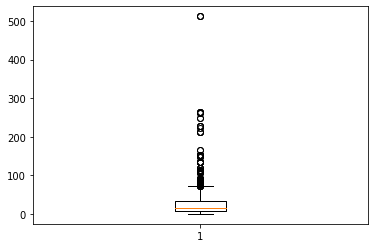

In [38]:
plt.boxplot(df['fare']);